Fourier tranform of light intensity, where the light is going through n pinholes, diffracting and interfering on a wall. The function drawPattern() draws the pattern and saves an image of it. The adjustable parameters are:


1. pinhole_number: number of pinholes that light comes through
2. iterations: higher iterations means more diffraction and interference. This parameter can be any real number greater than 0
3. resolution: controls the size of the generated grid. The grid size is 600*resolution x 600*resolution
4. ppi: pixel per inch for the saved image. Higher ppi gives higher quality images.
5. contrast: controls the contrast of the image. Set between 0 and 255, where 0 gives the highest contrast and 255 the lowest
6. colormap: sets the colormap of the resultant image. See [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) for details.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time

In [2]:
def expr(x,y, nnn):
    L = 0.1
    i = np.arange(nnn)+1
    c = 1
    omega = 100
    D = np.zeros([np.size(x), nnn])
    [X, I] = np.meshgrid(x, i)
    [Y, I] = np.meshgrid(y, i)
    D = np.sqrt((L**2) + (X - 2*np.cos(2*math.pi*I/nnn))**2 + (Y - 2*np.sin(2*math.pi*I/nnn))**2)
    a = 1j/D
    gamma = np.exp((-1j*D*omega)/c)
    return np.sum(gamma*a,0)

In [3]:
def generatePattern(nnn, ii, mag):    
    d = 6*mag*ii
    #delta = 0.02*ii
    l = 120*mag
    R1 = np.arange(l)
    R2 = np.arange(l)
    A1, A2 = np.meshgrid(R1, R2) 
    S = np.exp(1j*(A1+A2))
    f1, f2 = np.meshgrid(np.linspace(-d, d, l), np.linspace(-d, d, l))
    f = np.zeros((l, l), dtype=np.complex_)
    A = np.zeros((l, l), dtype=np.complex_)

    for i in range(np.size(R1)):
        f[i,:] = expr(f1[i,:], f2[i,:], nnn)

    AA = np.exp(1j*(A1+A2))
    s  = (AA*mag*ii*f)/nnn
    X  = np.absolute(np.fft.fft2(s))
    s  = np.absolute(s)
    return X*(255.0/X.max())#, s*(255.0/s.max())

In [22]:
def drawPattern(pinhole_number, iterations, resolution, ppi, contrast, colormap):
    
    fig_size = [8, 16]
    nnn, mag, ii = pinhole_number, resolution, iterations
    XX = generatePattern(nnn, ii, mag)
    # uncomment if you want 2:1 aspect ratio symmetric photos
    #XX = np.concatenate((XX, np.flip(X, axis=1)), axis=1)          
    #XX = np.concatenate((XX, np.flip(XX, axis=0)), axis=0)
    #XX = np.concatenate((XX, np.flip(XX, axis=0)), axis=0)
    plt.subplots(figsize=fig_size)
    
    plt.imshow(XX, interpolation='Gaussian', cmap=colormap, vmin=0, vmax=contrast);
    plt.axis('off')
    plt.savefig('output.png', bbox_inches = 'tight', pad_inches = 0, dpi=150)
    return f

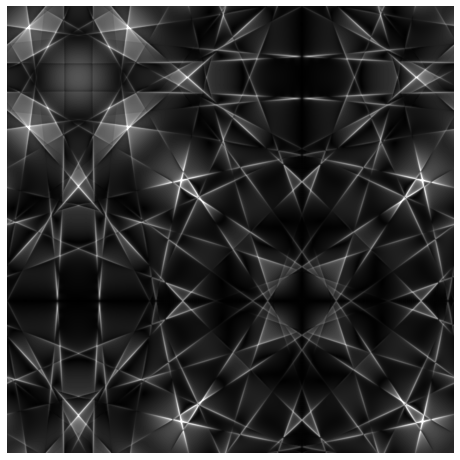

In [24]:
pinhole_number, resolution, ppi, contrast, colormap = 8, 6, 100, 120, 'gray'

iterations = 5
drawPattern(pinhole_number, iterations, resolution, ppi, contrast, colormap)


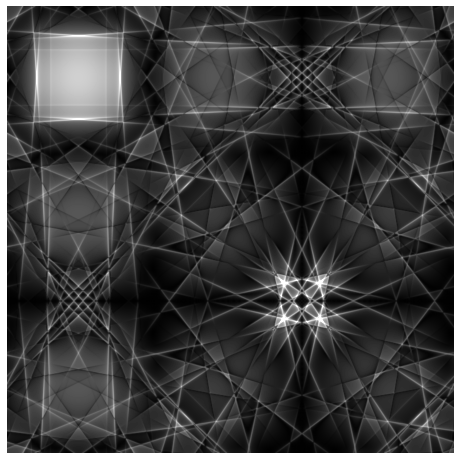

In [25]:
iterations = 10
drawPattern(pinhole_number, iterations, resolution, ppi, contrast, colormap)

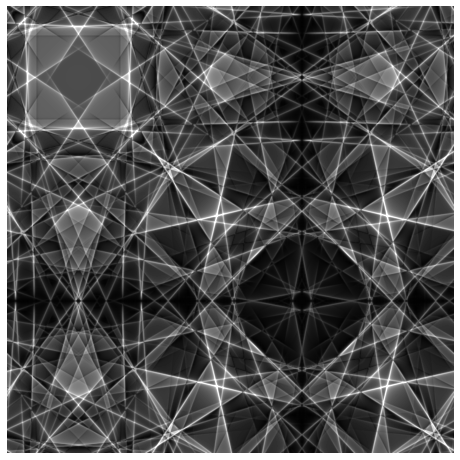

In [26]:
iterations = 15
drawPattern(pinhole_number, iterations, resolution, ppi, contrast, colormap)

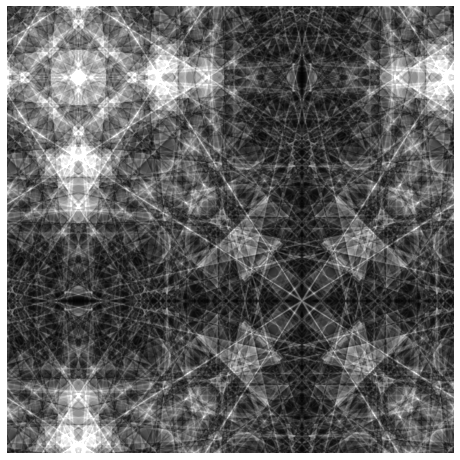

In [27]:
iterations = 100
drawPattern(pinhole_number, iterations, resolution, ppi, contrast, colormap)